In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("wisc_bc_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


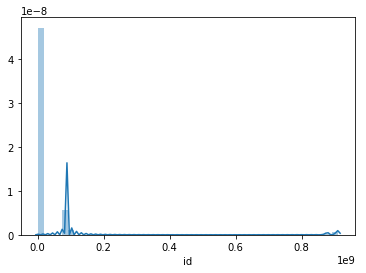

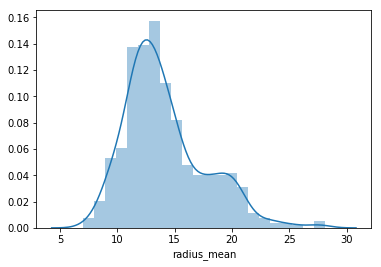

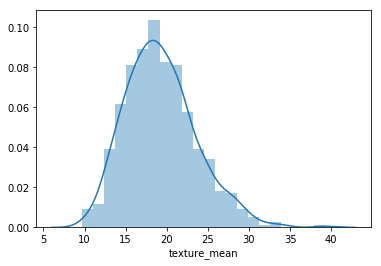

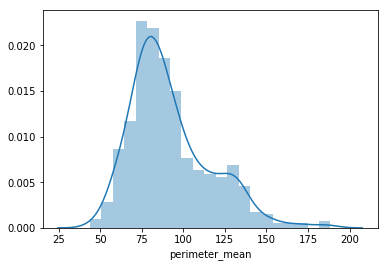

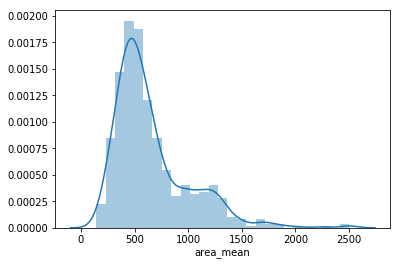

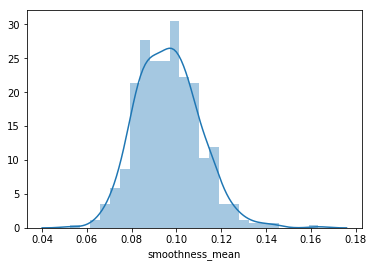

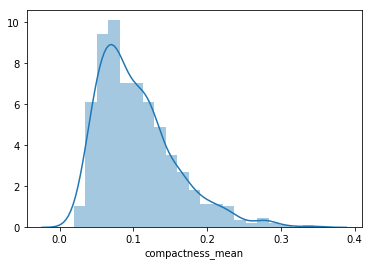

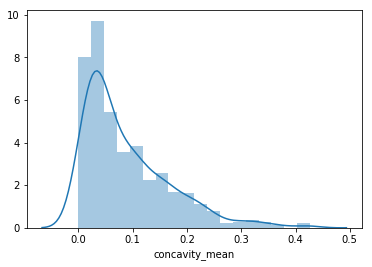

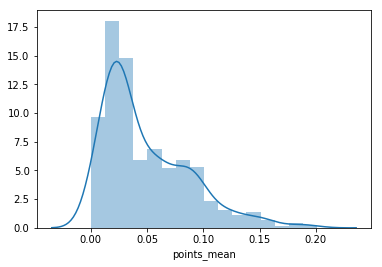

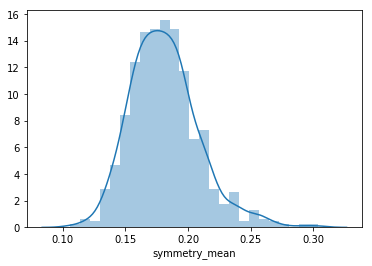

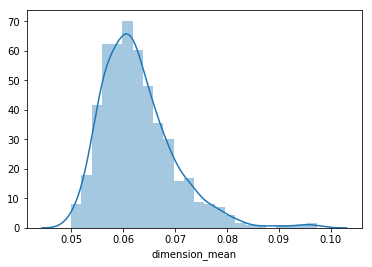

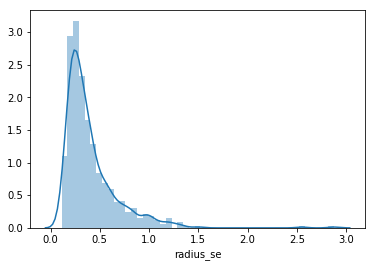

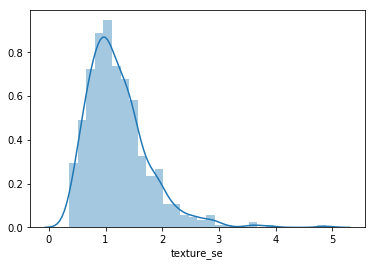

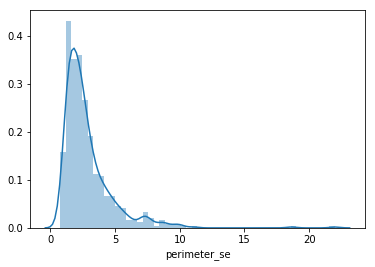

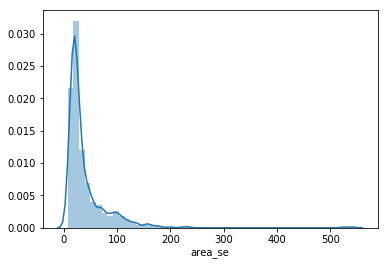

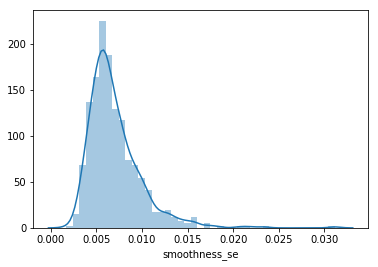

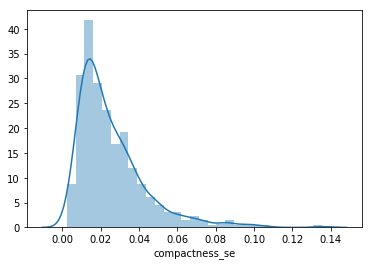

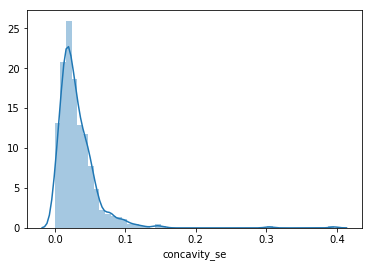

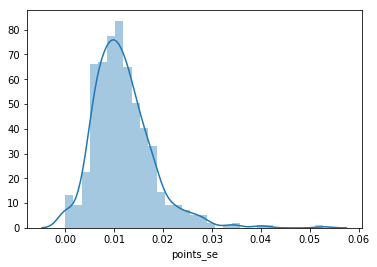

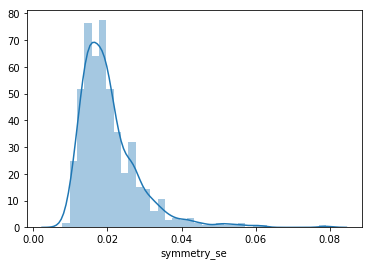

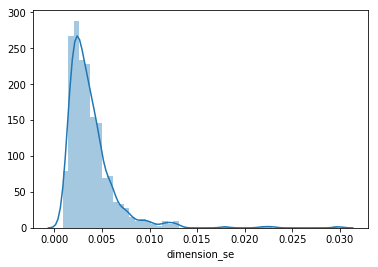

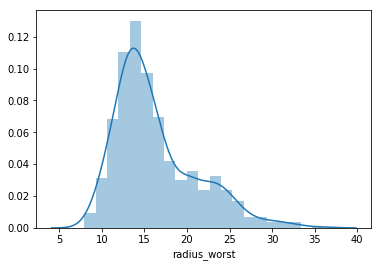

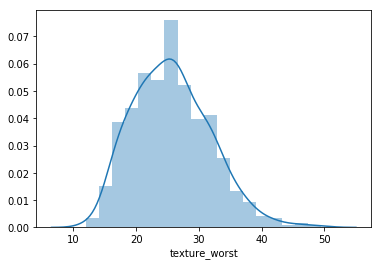

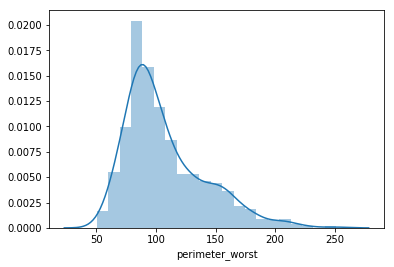

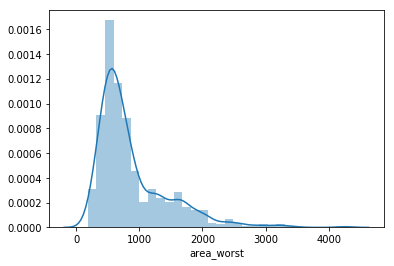

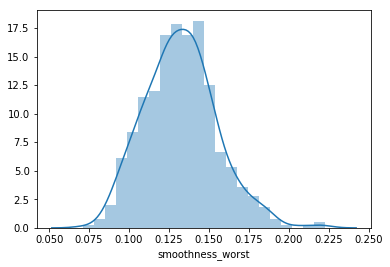

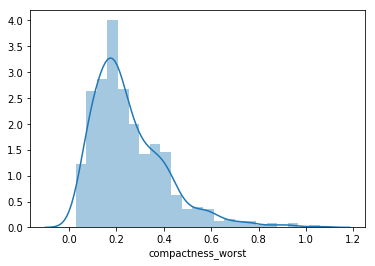

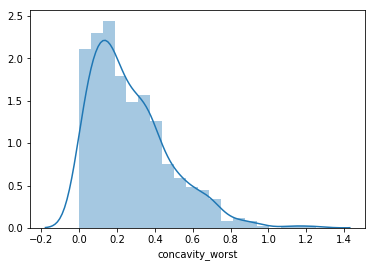

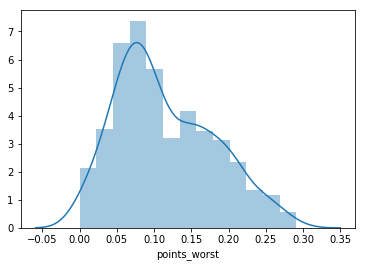

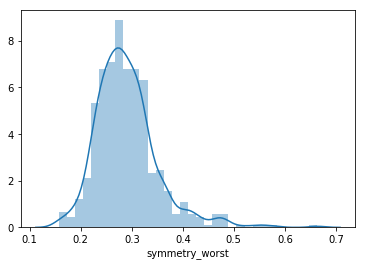

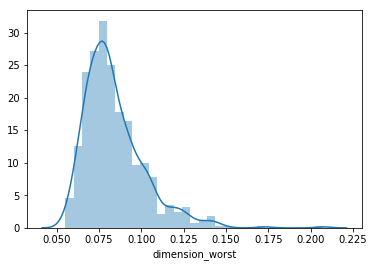

In [7]:
for column in df.columns:
    if df[column].dtype in ('int64','float64'):
        plt.figure()
        sns.distplot(df[column])

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [9]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


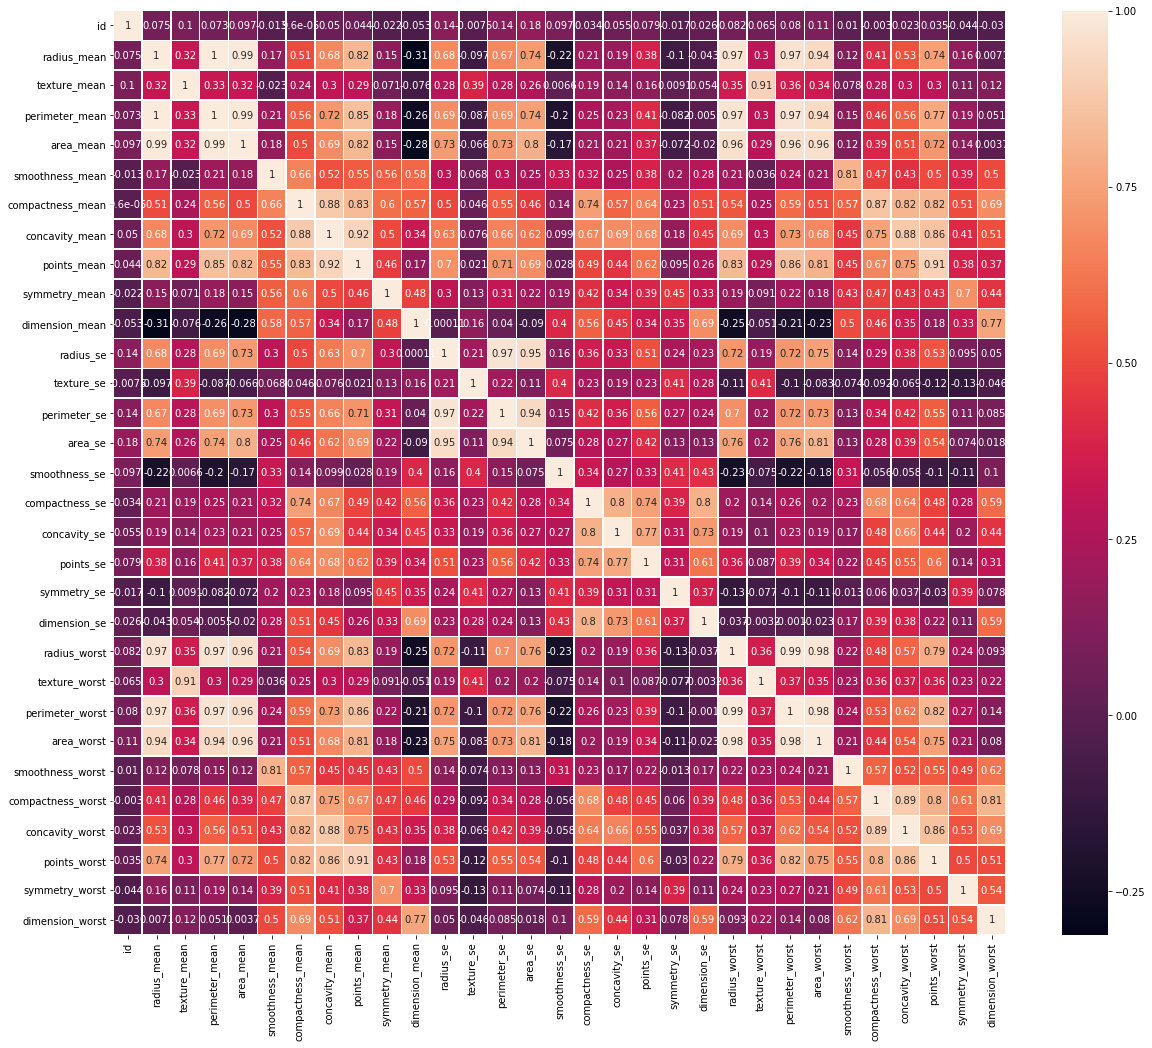

In [10]:
fig,ax= plt.subplots(figsize=(20,17))
sns.heatmap(df.corr(),annot=True,ax=ax, linewidths=0.5)

#### From the above heatmap, we found the highly corelated colums(corelation coeff.>=0.8) and took any one of them for our further analysis i.e. 15 columns out of 31 columns +1 target column

In [11]:
df1=df[['id','diagnosis','radius_mean','texture_mean','smoothness_mean','compactness_mean','symmetry_mean','dimension_mean','radius_se','texture_se','compactness_se','smoothness_se','points_se','symmetry_se','symmetry_worst','dimension_worst']]

### Encoding using label encoder

In [12]:
le=LabelEncoder()
df1['diagnosis']= le.fit_transform(df1['diagnosis'])

In [13]:
scale_df=df1.copy()

In [14]:
scale_df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,dimension_mean,radius_se,texture_se,compactness_se,smoothness_se,points_se,symmetry_se,symmetry_worst,dimension_worst
0,8670,1,15.46,19.48,0.10920,0.12230,0.1931,0.05796,0.4743,0.7859,0.01484,0.006240,0.010930,0.01397,0.2837,0.08019
1,8913,0,12.89,13.12,0.06955,0.03729,0.1337,0.05581,0.1532,0.4690,0.01345,0.004731,0.005905,0.01619,0.2309,0.06915
2,8915,0,14.96,19.10,0.08992,0.09823,0.1879,0.05852,0.2877,0.9480,0.02115,0.005332,0.011870,0.01522,0.2962,0.08472
3,9047,0,12.94,16.17,0.09879,0.08836,0.1735,0.06200,0.1458,0.9050,0.01285,0.002887,0.007308,0.01870,0.3297,0.07834
4,85715,1,13.17,18.66,0.11580,0.12310,0.2128,0.06777,0.2871,0.8937,0.02336,0.006532,0.012150,0.01743,0.3900,0.11790


### Scaling using MinMaxScaler

In [15]:
scaler= MinMaxScaler()
scale_df= pd.DataFrame(scaler.fit_transform(scale_df),columns=scale_df.columns)
scale_df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,dimension_mean,radius_se,texture_se,compactness_se,smoothness_se,points_se,symmetry_se,symmetry_worst,dimension_worst
0,0.000000e+00,1.0,0.401297,0.330402,0.510698,0.315686,0.439899,0.168492,0.131378,0.094082,0.094541,0.153891,0.207047,0.085664,0.250739,0.164961
1,2.666486e-07,0.0,0.279663,0.115320,0.152749,0.054935,0.139899,0.123210,0.015100,0.024045,0.084102,0.102594,0.111858,0.116902,0.146659,0.092549
2,2.688432e-07,0.0,0.377633,0.317552,0.336643,0.241856,0.413636,0.180286,0.063806,0.129906,0.141932,0.123024,0.224853,0.103253,0.275379,0.194674
3,4.136894e-07,0.0,0.282029,0.218465,0.416719,0.211582,0.340909,0.253580,0.012421,0.120403,0.079596,0.039909,0.138435,0.152220,0.341415,0.152827
4,8.454296e-05,1.0,0.292915,0.302672,0.570281,0.318140,0.539394,0.375105,0.063589,0.117906,0.158530,0.163817,0.230157,0.134350,0.460280,0.412305


In [16]:
scale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,0.033318,0.137187,0.0,0.000944,0.000985,0.009661,1.0
diagnosis,569.0,0.372583,0.483918,0.0,0.000000,0.000000,1.000000,1.0
radius_mean,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
dimension_mean,569.0,0.270379,0.148702,0.0,0.163016,0.243892,0.340354,1.0
radius_se,569.0,0.106345,0.100421,0.0,0.043781,0.077023,0.133044,1.0
texture_se,569.0,0.189324,0.121917,0.0,0.104690,0.165267,0.246155,1.0


#### As we can see in the output above, we can choose the columns having high variance. Here I am taking the top 3 columns having highest standard deviation(variance)  i.e. the columns: 'radius_mean', 'compactness_mean' and 'dimension_mean' for further classification.

In [17]:
scale_df=scale_df[[ 'diagnosis','radius_mean', 'compactness_mean' ,'dimension_mean']]
scale_df.head()

,diagnosis,radius_mean,compactness_mean,dimension_mean
0,1.0,0.401297,0.315686,0.168492
1,0.0,0.279663,0.054935,0.123210
2,0.0,0.377633,0.241856,0.180286
3,0.0,0.282029,0.211582,0.253580
4,1.0,0.292915,0.318140,0.375105


### Exploration of data

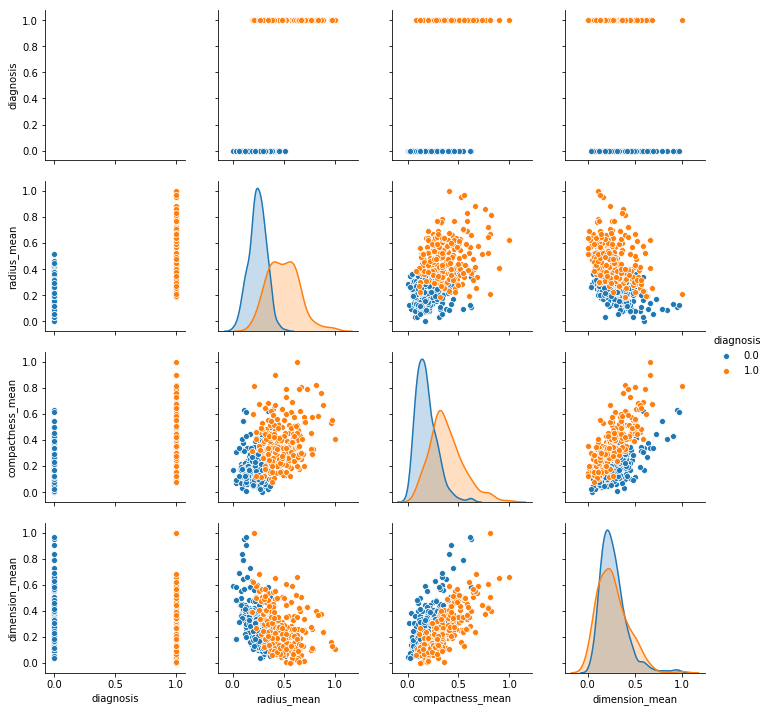

In [18]:
sns.pairplot(scale_df, hue='diagnosis')

In [19]:
X_train, X_test= train_test_split(scale_df, test_size=0.3,random_state=100)
X_train.shape, X_test.shape

((398, 4), (171, 4))

## Logistic Regression:

In [20]:
features= scale_df.columns.drop('diagnosis')
target=['diagnosis']
model_log= LogisticRegression()
model_log.fit(X_train[features],X_train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### To find the accuracy of the model usin R-squared value

In [21]:
train_log_acc= model_log.score(X_train[features],X_train[target])
test_log_acc=model_log.score(X_test[features],X_test[target])
train_log_acc,test_log_acc

(0.8944723618090452, 0.9005847953216374)

#### To find the accuracy of the model using confusion matrix

In [22]:
train_log_pred= model_log.predict(X_train[features])
test_log_pred= model_log.predict(X_test[features])
train_log_conf= confusion_matrix(X_train[target],train_log_pred)
test_log_conf= confusion_matrix(X_test[target], test_log_pred)

In [23]:
pd.DataFrame(train_log_conf, columns=model_log.classes_, index= model_log.classes_)

,0.0,1.0
0.0,240,8
1.0,34,116


In [24]:
pd.DataFrame(test_log_conf, columns=model_log.classes_, index= model_log.classes_)

,0.0,1.0
0.0,106,3
1.0,14,48


In [25]:
print(classification_report(X_train[target],train_log_pred))
print(classification_report(X_test[target],test_log_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       248
         1.0       0.94      0.77      0.85       150

   micro avg       0.89      0.89      0.89       398
   macro avg       0.91      0.87      0.88       398
weighted avg       0.90      0.89      0.89       398

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       109
         1.0       0.94      0.77      0.85        62

   micro avg       0.90      0.90      0.90       171
   macro avg       0.91      0.87      0.89       171
weighted avg       0.90      0.90      0.90       171



## Decision Tree Analysis:

In [26]:
model_t=DecisionTreeClassifier()
model_t.fit(X_train[features],X_train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
train_t_acc= model_t.score(X_train[features],X_train[target])
test_t_acc=model_t.score(X_test[features],X_test[target])
train_t_acc,test_t_acc

(1.0, 0.9064327485380117)

#### As we can see in the above result the score of training data set is 1.0, which indicates over- fitting, we must avoid such models
#### Lets change some attributes and check:

In [28]:
model_t1=DecisionTreeClassifier(min_samples_split=10, min_impurity_decrease=0.005)
model_t1.fit(X_train[features],X_train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
train_t1_acc= model_t1.score(X_train[features],X_train[target])
test_t1_acc=model_t1.score(X_test[features],X_test[target])
train_t1_acc,test_t1_acc

(0.9195979899497487, 0.9005847953216374)

#### As we can see in the above result, the training score may show that model is not over-fitting, but testing accuracy has not changed
#### lets try one more:

In [30]:
model_t2=DecisionTreeClassifier(min_samples_split=20, min_impurity_decrease=0.01)
model_t2.fit(X_train[features],X_train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
train_t2_acc= model_t2.score(X_train[features],X_train[target])
test_t2_acc=model_t2.score(X_test[features],X_test[target])
train_t2_acc,test_t2_acc

(0.914572864321608, 0.8947368421052632)

#### from the above 3 decision tree models, we saw that model_t1 was best as its training score does not indicate overfiting, and the test_accuracy is nice
#### To find the accuracy of model_t1[found best among] using Confusion_matrix:

In [32]:
train_t_pred= model_t1.predict(X_train[features])
test_t_pred= model_t1.predict(X_test[features])
train_t_conf= confusion_matrix(X_train[target],train_t_pred)
test_t_conf=confusion_matrix(X_test[target],test_t_pred)

In [33]:
pd.DataFrame(train_t_conf, columns= model_t1.classes_, index= model_t1.classes_)

,0.0,1.0
0.0,237,11
1.0,21,129


In [34]:
pd.DataFrame(test_t_conf, columns= model_t1.classes_, index= model_t1.classes_)

,0.0,1.0
0.0,102,7
1.0,10,52


#### the classification report:

In [35]:
print(classification_report(X_train[target], train_t_pred))
print(classification_report(X_test[target], test_t_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       248
         1.0       0.92      0.86      0.89       150

   micro avg       0.92      0.92      0.92       398
   macro avg       0.92      0.91      0.91       398
weighted avg       0.92      0.92      0.92       398

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       109
         1.0       0.88      0.84      0.86        62

   micro avg       0.90      0.90      0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



## KNN ALgorithm:

In [36]:
model_k= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model_k.fit(X_train[features],X_train[target])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
train_k_acc= model_k.score(X_train[features],X_train[target])
test_k_acc= model_k.score(X_test[features],X_test[target])
train_k_acc, test_k_acc

(0.914572864321608, 0.9122807017543859)

In [38]:
train_k_pred= model_k.predict(X_train[features])
test_k_pred= model_k.predict(X_test[features])
train_k_conf=confusion_matrix(X_train[target],train_k_pred)
test_k_conf= confusion_matrix(X_test[target],test_k_pred)

In [39]:
pd.DataFrame(train_k_conf, columns=model_k.classes_, index= model_k.classes_)

,0.0,1.0
0.0,238,10
1.0,24,126


In [40]:
pd.DataFrame(test_k_conf,columns= model_k.classes_, index= model_k.classes_)

,0.0,1.0
0.0,103,6
1.0,9,53


In [41]:
print(classification_report(X_train[target], train_k_pred))
print(classification_report(X_test[target],test_k_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       248
         1.0       0.93      0.84      0.88       150

   micro avg       0.91      0.91      0.91       398
   macro avg       0.92      0.90      0.91       398
weighted avg       0.92      0.91      0.91       398

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       109
         1.0       0.90      0.85      0.88        62

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



## Support Vector Machine:

In [42]:
model_s= SVC(kernel='rbf')
model_s.fit(X_train[features],X_train[target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
train_s_acc=model_s.score(X_train[features],X_train[target])
test_s_acc=model_s.score(X_test[features],X_test[target])
train_s_acc, test_s_acc

(0.907035175879397, 0.9005847953216374)

In [44]:
train_s_pred= model_s.predict(X_train[features])
test_s_pred= model_s.predict(X_test[features])
train_s_conf= confusion_matrix(X_train[target],train_s_pred)
test_s_conf= confusion_matrix(X_test[target],test_s_pred)

In [45]:
pd.DataFrame(train_s_conf, columns= model_s.classes_, index= model_s.classes_)

,0.0,1.0
0.0,242,6
1.0,31,119


In [46]:
pd.DataFrame(test_s_conf,columns= model_s.classes_, index= model_s.classes_)

,0.0,1.0
0.0,107,2
1.0,15,47


In [47]:
print(classification_report(X_train[target],train_s_pred))
print(classification_report(X_test[target],test_s_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       248
         1.0       0.95      0.79      0.87       150

   micro avg       0.91      0.91      0.91       398
   macro avg       0.92      0.88      0.90       398
weighted avg       0.91      0.91      0.91       398

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       109
         1.0       0.96      0.76      0.85        62

   micro avg       0.90      0.90      0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



## ----------------------------------------------------------------------------------------------------------------------------
### Now lets do some feature engineering over the actual dataframe

### Preprocessing:

In [48]:
X= df.drop("diagnosis", 1)
Y= df["diagnosis"]

In [98]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=100)

### Scaling:

In [50]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [51]:
X_train.shape, X_test.shape

((398, 31), (171, 31))

### Feature Engineering:
#### PCA:

In [82]:
pca=PCA()
X_train_p= pca.fit_transform(X_train)
X_test_p=pca.transform(X_test)
X_train

array([[8.82815269e-05, 5.73436505e-01, 2.86438958e-01, ...,
        7.75749225e-01, 4.81111903e-01, 1.49744195e-01],
       [9.69775623e-04, 5.79803125e-01, 3.10787961e-01, ...,
        6.82053049e-01, 3.33333333e-01, 2.90240063e-01],
       [9.80717345e-02, 2.48249180e-01, 1.23774095e-01, ...,
        2.89734757e-01, 2.37348539e-01, 1.80309589e-01],
       ...,
       [9.98035983e-04, 3.06038494e-01, 1.17010484e-01, ...,
        3.49638305e-01, 1.41363744e-01, 1.14718615e-01],
       [9.31587817e-04, 5.64131446e-01, 2.99628001e-01, ...,
        7.20289356e-01, 4.68519838e-01, 1.82998819e-01],
       [9.69169157e-02, 4.78426955e-01, 1.00000000e+00, ...,
        7.11677575e-01, 3.06010929e-01, 1.96248196e-01]])

In [74]:
variance_list=pca.explained_variance_ratio_
feat= df.columns.drop("diagnosis")
variances= pd.DataFrame(np.array([feat,variance_list]).T, columns=["Features","Variance"])
variances.sort_values(by='Variance', ascending=False)

,Features,Variance
0,id,0.493169
1,radius_mean,0.171524
2,texture_mean,0.070826
3,perimeter_mean,0.0665616
4,area_mean,0.0447683
5,smoothness_mean,0.0342638
6,compactness_mean,0.0279532
7,concavity_mean,0.0176914
8,points_mean,0.0119061
9,symmetry_mean,0.0108809


In [75]:
pca=PCA(n_components=2)
X_train_p= pca.fit_transform(X_train)
X_test_p=pca.transform(X_test)

### Modelling using ensemble technique(RandomForestClassifier):

In [55]:
model_rf= RandomForestClassifier(n_estimators=10,min_samples_split=10, min_impurity_decrease=0.01)
model_rf.fit(X_train_p,Y_train)
train_rf_acc=model_rf.score(X_train_p,Y_train)
test_rf_acc= model_rf.score(X_test_p,Y_test)
train_rf_acc, test_rf_acc

(0.9422110552763819, 0.9239766081871345)

In [56]:
train_rf_pred=model_rf.predict(X_train_p)
test_rf_pred=model_rf.predict(X_test_p)
train_rf_conf= confusion_matrix(Y_train,train_rf_pred)
test_rf_conf=confusion_matrix(Y_test,test_rf_pred)

In [57]:
pd.DataFrame(test_rf_conf, columns=model_rf.classes_, index=model_rf.classes_)

,B,M
B,100,9
M,4,58


In [58]:
print(classification_report(Y_train,train_rf_pred))
print(classification_report(Y_test,test_rf_pred))

              precision    recall  f1-score   support

           B       0.94      0.97      0.95       248
           M       0.95      0.89      0.92       150

   micro avg       0.94      0.94      0.94       398
   macro avg       0.94      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398

              precision    recall  f1-score   support

           B       0.96      0.92      0.94       109
           M       0.87      0.94      0.90        62

   micro avg       0.92      0.92      0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



### LDA:

In [99]:
lda=LDA(n_components=2)
X_train_l=lda.fit_transform(X_train,Y_train)
X_test_l=lda.transform(X_test)

### Modelling using ensemble(AdaBoostClassifier):

In [106]:
model_ab=AdaBoostClassifier(n_estimators=10)
model_ab.fit(X_train,Y_train)
train_ab_acc= model_ab.score(X_train,Y_train)
test_ab_acc=model_ab.score(X_test,Y_test)
train_ab_acc,test_ab_acc

(0.9899497487437185, 0.9473684210526315)

In [107]:
feature_imps = pd.DataFrame(np.array([feat,model_ab.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

,feature,importance
2,texture_mean,0.2
23,perimeter_worst,0.2
0,id,0.1
28,points_worst,0.1
5,smoothness_mean,0.1
27,concavity_worst,0.1
14,area_se,0.1
17,concavity_se,0.1
21,radius_worst,0
19,symmetry_se,0


In [61]:
test_ab_pred=model_ab.predict(X_test_l)
test_ab_conf=confusion_matrix(Y_test,test_ab_pred)
pd.DataFrame(test_ab_conf, columns=model_ab.classes_, index= model_ab.classes_)

,B,M
B,104,5
M,1,61


In [62]:
acc_ab= accuracy_score(Y_test,test_ab_pred)
print("Accuracy: ",acc_ab)

Accuracy:  0.9649122807017544


In [63]:
print(classification_report(Y_test,test_ab_pred))

              precision    recall  f1-score   support

           B       0.99      0.95      0.97       109
           M       0.92      0.98      0.95        62

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [64]:
test_ab_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'M', 'B'], dtype=object)

In [65]:
print(np.unique(Y.values))

['B' 'M']


#### mean-squared can be used only if target variable has numeric value

mse_ab_score= mean_squared_error(Y_test,test_ab_pred)
rmse_ab=np.sqrt(mse_ab_score)
rmse_ab

### To find accuracy of all the algorithms used: 

In [66]:
acc_rf= accuracy_score(Y_test,test_rf_pred)        # Y_test can be used as it is an array nd not a dataframe
acc_rf

0.9239766081871345

In [67]:
df_check= pd.DataFrame()

In [68]:
df_check["Algorithm"]= ['Logistic', 'Decision-tree', 'KNN','SVM', 'Random-Forest','Adaboost']
df_check["Test_score"] = [test_log_acc, test_t_acc, test_k_acc, test_s_acc, acc_rf, acc_ab]
df_check

,Algorithm,Test_score
0,Logistic,0.900585
1,Decision-tree,0.906433
2,KNN,0.912281
3,SVM,0.900585
4,Random-Forest,0.923977
5,Adaboost,0.964912


[Text(0, 0, 'Logistic'),
 Text(0, 0, 'Decision-tree'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Random-Forest'),
 Text(0, 0, 'Adaboost')]

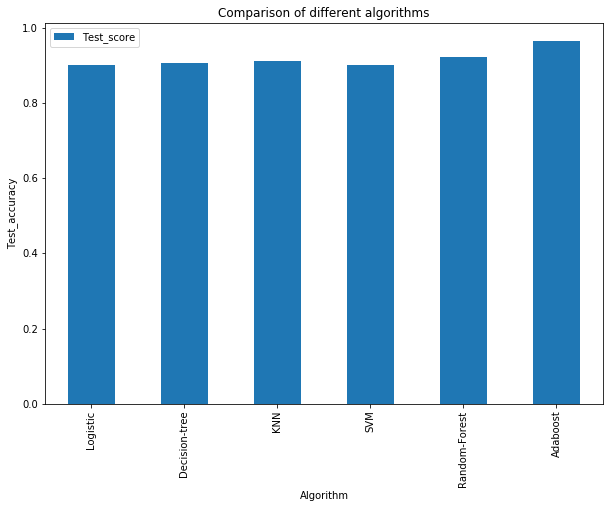

In [69]:
bar= df_check.plot.bar(figsize=(10,7))
bar.set_title("Comparison of different algorithms")
bar.set_xlabel("Algorithm")
bar.set_ylabel("Test_accuracy")
bar.set_xticklabels(df_check["Algorithm"])

